In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
import path as path
import os
import statsmodels.api as sm

In [2]:
os.getcwd()

'c:\\Users\\Alif\\Desktop\\Portfolio\\Econometrics\\my_project'

In [3]:
df = pd.read_csv('c:\\Users\\Alif\\Desktop\\Portfolio\\Econometrics\\my_project\\HRS_data.csv')

In [4]:
df.head()

,rassrecv,h14itot,r13jhours,r14isret,racohbyr,r14ipena,r14jnjob,r14hlthlm,r14peninc,r14peni_n,...,inw8,inw9,inw10,inw11,inw12,inw13,inw14,retire,r14agey_b,ragender
0,1,664920.0,15,42000.0,2,16560.0,6,1,1,1,...,0,0,0,0,0,0,1,0,90,1
1,1,75300.0,6,25200.0,3,0.0,2,1,0,0,...,0,0,0,0,0,0,1,1,77,1
2,1,9000.0,0,9000.0,3,0.0,4,0,0,0,...,0,0,0,0,0,0,1,1,85,1
3,1,20520.0,0,3720.0,3,0.0,4,1,0,0,...,0,0,0,0,0,0,1,1,77,2
4,1,115000.0,30,32400.0,3,0.0,3,1,0,0,...,0,0,0,0,0,0,1,0,78,2


In [5]:
###select variables 
# Question are older people more likely to receive social security benefits?
df2=df.loc[ :,['rassrecv', 'r14agey_b'] ]
df2.nunique()

rassrecv      2
r14agey_b    44
dtype: int64

In [6]:
df2 = df2.dropna()

In [7]:
df2.describe()

,rassrecv,r14agey_b
count,12190.000000,12190.000000
mean,0.782691,65.584906
std,0.412432,6.422076
min,0.000000,55.000000
25%,1.000000,61.000000
50%,1.000000,64.000000
75%,1.000000,68.000000
max,1.000000,99.000000


In [8]:
X = df2['r14agey_b'].values.reshape(-1,1)
y = df2['rassrecv'].values.reshape(-1,1)

model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [9]:
print("Intercept:", model.intercept_)
print("Coefficient:", model.coef_)

Intercept: [-0.86966823]
Coefficient: [[0.0251942]]


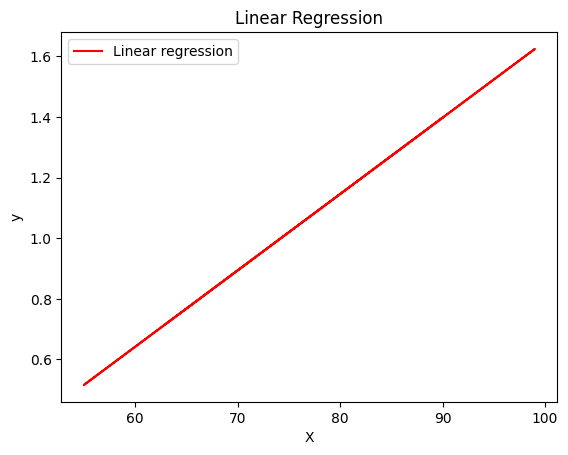

In [10]:
# Generate the predicted values
y_pred = model.predict(X)

# Plot the scatter plot and the linear regression line
# plt.scatter(X, y, label='Data')
plt.plot(X, y_pred, label='Linear regression', color='red')

plt.xlabel('X')
plt.ylabel('y')
plt.title('Linear Regression')
plt.legend()
plt.show()

In [11]:
# standard error and calculate t-statistics
X2 = sm.add_constant(X)

##linear regression
ols = sm.OLS(y,X2)

ols_result = ols.fit()
ols_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.154
Model:                            OLS   Adj. R-squared:                  0.154
Method:                 Least Squares   F-statistic:                     2217.
Date:                Thu, 25 May 2023   Prob (F-statistic):               0.00
Time:                        19:59:49   Log-Likelihood:                -5481.3
No. Observations:               12190   AIC:                         1.097e+04
Df Residuals:                   12188   BIC:                         1.098e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.8697      0.035    -24.664      0.000      -0.939      -0.801
x1             0.0252      0.001     47.085      0.000       0.024       0.026
==============================================================================
Omnibus:                     1673.192   Durbin-Watson:                   0.927
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2076.073
Skew:                          -0.975   Prob(JB):                         0.00
Kurtosis:                       2.463   Cond. No.                         676.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [12]:
###Heteroskedastic robust standard error

ols = sm.OLS(y,X2)
ols_result = ols.fit(cov_type='HC1')
ols_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.154
Model:                            OLS   Adj. R-squared:                  0.154
Method:                 Least Squares   F-statistic:                     2542.
Date:                Thu, 25 May 2023   Prob (F-statistic):               0.00
Time:                        19:59:53   Log-Likelihood:                -5481.3
No. Observations:               12190   AIC:                         1.097e+04
Df Residuals:                   12188   BIC:                         1.098e+04
Df Model:                           1                                         
Covariance Type:                  HC1                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.8697      0.035    -24.969      0.000      -0.938      -0.801
x1             0.0252      0.000     50.423      0.000       0.024       0.026
==============================================================================
Omnibus:                     1673.192   Durbin-Watson:                   0.927
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2076.073
Skew:                          -0.975   Prob(JB):                         0.00
Kurtosis:                       2.463   Cond. No.                         676.
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC1)
"""